In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import *
rc("image", cmap="hot")
import pylab
import os
import glob
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import time
import resource
import psutil
from contextlib import closing
from torch.autograd import Variable
import uuid
import dlinputs as dli

# SQLite input, mapping, renaming, batching

# itinfo 0
__epoch__ 0
input float32 (48, 247)
transcript u'Continuum Mechanics'
['input', '_bucket', 'transcript', 'target', '__epoch__']
(5, 48, 1295)
(5, 159, 97)


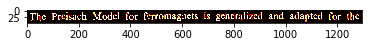

In [3]:
training = (dli.itsqlite("testdata/uw3small.db", epochs=999999) |
            dli.itmap(image=dli.pilgray) |
            dli.itren(input="image", transcript="transcript") |
            dli.itinfo() |
            dli.itbatchedbuckets() |
            dli.itlinebatcher())
item = training.next()
print item.keys()
print item["input"].shape
print item["target"].shape
imshow(item["input"][0])